In [31]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import keras

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [18]:
current_dir = os.getcwd()

# Join the current directory with the desired path
target_dir_train = os.path.join(current_dir, 'MRNet-v1.0', 'train', 'axial').replace("\\", "/")
target_dir_valid= os.path.join(current_dir, 'MRNet-v1.0', 'valid', 'axial').replace("\\", "/")
print(target_dir_train)

e:/workspace/PythonProjects/trincas-2unidade/MRNet-v1.0/train/axial


In [22]:
image_files = os.listdir(target_dir_train)
print(image_files)

['0000.npy', '0001.npy', '0002.npy', '0003.npy', '0004.npy', '0005.npy', '0006.npy', '0007.npy', '0008.npy', '0009.npy', '0010.npy', '0011.npy', '0012.npy', '0013.npy', '0014.npy', '0015.npy', '0016.npy', '0017.npy', '0018.npy', '0019.npy', '0020.npy', '0021.npy', '0022.npy', '0023.npy', '0024.npy', '0025.npy', '0026.npy', '0027.npy', '0028.npy', '0029.npy', '0030.npy', '0031.npy', '0032.npy', '0033.npy', '0034.npy', '0035.npy', '0036.npy', '0037.npy', '0038.npy', '0039.npy', '0040.npy', '0041.npy', '0042.npy', '0043.npy', '0044.npy', '0045.npy', '0046.npy', '0047.npy', '0048.npy', '0049.npy', '0050.npy', '0051.npy', '0052.npy', '0053.npy', '0054.npy', '0055.npy', '0056.npy', '0057.npy', '0058.npy', '0059.npy', '0060.npy', '0061.npy', '0062.npy', '0063.npy', '0064.npy', '0065.npy', '0066.npy', '0067.npy', '0068.npy', '0069.npy', '0070.npy', '0071.npy', '0072.npy', '0073.npy', '0074.npy', '0075.npy', '0076.npy', '0077.npy', '0078.npy', '0079.npy', '0080.npy', '0081.npy', '0082.npy', '00

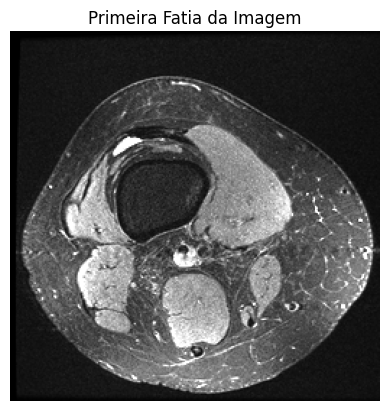

In [20]:
image_path = os.path.join(target_dir_train, image_files[0])
image = np.load(image_path)

# Selecionar a primeira fatia da pilha de imagens para exibição
image_slice = image[0]  # Seleciona a primeira fatia (pode alterar o índice para visualizar outras fatias)

# Exibir a imagem
plt.imshow(image_slice, cmap='gray')
plt.title('Primeira Fatia da Imagem')
plt.axis('off')
plt.show()

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [50]:
output_dir = os.path.join(current_dir, 'images')
# Crie o diretório de saída se ele não existir
os.makedirs(output_dir, exist_ok=True)

# Itera sobre os arquivos .npy e converte para imagem
for npy_file in os.listdir(target_dir_train):
    if npy_file.endswith('.npy'):
        # Carrega a matriz numpy
        npy_path = os.path.join(target_dir_train, npy_file)
        image_data = np.load(npy_path)

        image_slice = image_data[0]
        # Assuming the data represents a single pixel with 256 channels
        image_slice = image_slice.reshape((256,256))  # Reshape to a 1D array with 256 elements
        
        # Converte a matriz para imagem (supondo que seja uma imagem em escala de cinza)
        image = PIL.Image.fromarray(image_slice.astype('uint8'))

        # Salva a imagem no diretório de saída
        image_name = os.path.splitext(npy_file)[0] + '.png'
        image.save(os.path.join(output_dir, image_name))

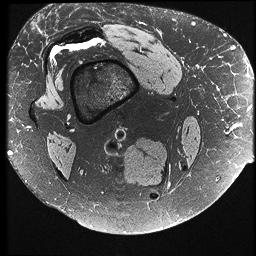

In [25]:
PIL.Image.open('images/0003.png')

In [35]:
image_dir = "e:/workspace/PythonProjects/trincas-2unidade/images"
# Depois disso, você pode usar image_dataset_from_directory
train_ds = keras.utils.image_dataset_from_directory(
    image_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1130 files belonging to 1 classes.
Using 904 files for training.


In [40]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  image_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1130 files belonging to 1 classes.
Using 226 files for validation.


In [36]:
class_names = train_ds.class_names
print(class_names)

['axial']


In [37]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

e:\workspace\PythonProjects\trincas-2unidade\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,988,769 (15.22 MB)

 Trainable params: 3,988,769 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/

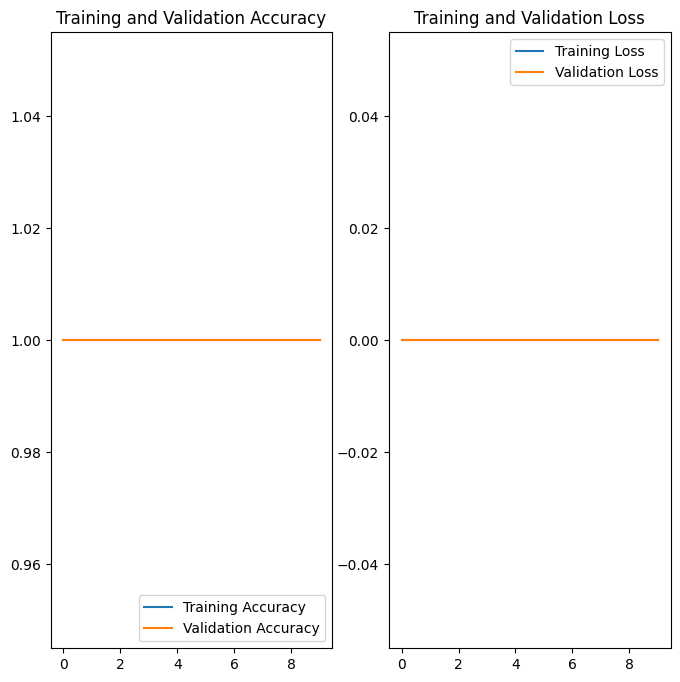

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()